- - - -
#  Numerical IntegrationTutorial


- - - -

Martin Veillette @ Berea College

- - - -


There are several methods to integrate numerically: they go by different name: 

 - Trapezium rule
 - Mid-point rule
 - Simpson's rule
 - Romberg integration
 - Gauss quadrature 
 
All of these methods rely on breaking the interval of integration into many sub intervals.
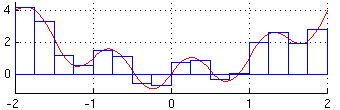


This tutorial explains how we can leverage the power of a computer to determine the integral using the mid-point rule ( also known as the rectangle rule)

## Python Initialization with module imports

In [1]:
# setup 
import numpy as np
import sympy as sp
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

#get_ipython().magic('matplotlib')  # separate window
get_ipython().magic('matplotlib inline') # inline plotting


## Objective

We would like to evaluate an integral of the form
$$ \int_a^b f(x) dx $$

where $f(x)= x^2 \exp \left(-  \left(\frac{x}{c}\right)^2 \right)  $ 

For concreteness, let take $a=1, b=5, c= 3$

In [2]:
# define our function

def f(x):
    c = 3
    y= x**2 * np.exp(-(x/c)**2)
    return  y

In [3]:
# sanity check to see if our function returns a value
f(5.2)

1.34027230597


## Plotting 

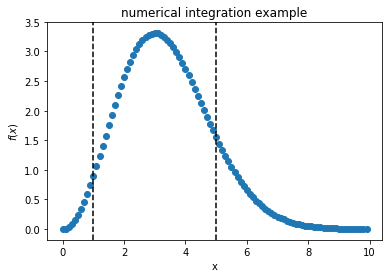

In [4]:
# let's plot the function to have an idea of the region of integration
x = np.arange(0, 10, 0.1)
y = f(x)
plt.scatter(x,y);

a=1;
b=5;
plt.axvline(x=a, color='k', linestyle='--')
plt.axvline(x=b, color='k', linestyle='--')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.title('numerical integration example')
plt.show()

In [5]:
def riemannPlot(f,a,b,spacing): 
    # plot method to illustrate what a riemann sum is
    # takes a function as a parameter, a lower bound, a and an upper bound ,b, as well
    # as the width of the intervals 
    
    smoothh= (b-a)/1000.0
    x = np.arange(a,b+smoothh,smoothh)
    
    plt.plot(x,f(x))
    riemannx = np.arange(a,b, spacing)
    riemanny = f(riemannx)
    
    plt.bar(riemannx,riemanny,width=spacing,alpha=0.3,facecolor='orange', edgecolor='r')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Riemann Sum for f(x)')
    plt.xlim(-1+a,b+1)
    plt.show()

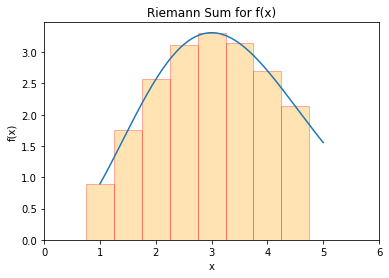

In [6]:
riemannPlot(f,a,b,0.5)

In [7]:
# we can divide the domain of integration in small intervals (separated by the quantity named spacing)

spacing = 0.01;
a=1;
b=5;

x = np.arange(a, b, spacing);
y = f(x);


In [8]:
y

array([ 0.89483932,  0.91078922,  0.92682108,  0.94293288,  0.95912262,
        0.97538826,  0.99172778,  1.00813913,  1.02462028,  1.04116917,
        1.05778375,  1.07446196,  1.09120173,  1.108001  ,  1.12485768,
        1.14176972,  1.15873501,  1.17575148,  1.19281703,  1.20992959,
        1.22708706,  1.24428733,  1.26152832,  1.27880793,  1.29612405,
        1.3134746 ,  1.33085746,  1.34827054,  1.36571174,  1.38317895,
        1.40067008,  1.41818303,  1.4357157 ,  1.453266  ,  1.47083184,
        1.48841111,  1.50600175,  1.52360164,  1.54120873,  1.55882092,
        1.57643615,  1.59405233,  1.61166741,  1.62927931,  1.64688599,
        1.66448539,  1.68207547,  1.69965417,  1.71721947,  1.73476934,
        1.75230176,  1.76981471,  1.78730618,  1.80477417,  1.82221669,
        1.83963175,  1.85701738,  1.87437161,  1.89169247,  1.90897802,
        1.92622632,  1.94343543,  1.96060343,  1.97772841,  1.99480847,
        2.01184171,  2.02882626,  2.04576024,  2.0626418 ,  2.07

In [9]:
# summing all the y values and multiplying by the width of the interval will give us an ggood approximation to the integral
integral = y.sum()*spacing
print('number of intervals',len(x))
print('result=', integral) 

number of intervals 400
result= 10.029399778


A more sophisticated approach uses the trapezoid rule to determine the area under the curve

In [10]:
# Using the trapezoidal rule, we can numerically integrate the function more accurately
np.trapz(y,x)

10.0170981692

Increasing the number of intervals makes the result more precise.